# EDA - King County Housing Dataset

This notebook documents my analysis of the publicly available dataset of houses in [King County, USA](https://en.wikipedia.org/wiki/King_County,_Washington). For the purpose of this analysis, I am assuming the role of a data analyst hired by an imaginary client, with the goal to provide recommendations tailored to their specific requirements.  

My client is:

| Name                | Role | Characteristics                                                                                                                                                                 |
| ------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Jacob Phillips      | Buyer       | Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront   

## 1. Load dataset, inspect and clean

In [41]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# load csv previously obtained from SQL query
df = pd.read_csv('data/eda.csv')
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,...,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801


In [3]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
21592,9842300095,5.000,2.000,1600.000,4168.000,1.500,0.000,0.000,3,7,...,0.000,98126,47.530,-122.381,1190.000,4168.000,2014-07-25,365000.000,9842300095,16724
21593,9842300485,2.000,1.000,1040.000,7372.000,1.000,0.000,0.000,5,7,...,0.000,98126,47.529,-122.378,1930.000,5150.000,2015-03-11,380000.000,9842300485,3258
21594,9842300540,3.000,1.000,1100.000,4128.000,1.000,0.000,0.000,4,7,...,NaN,98126,47.530,-122.379,1510.000,4538.000,2014-06-24,339000.000,9842300540,7615
21595,9895000040,2.000,1.750,1410.000,1005.000,1.500,0.000,0.000,3,9,...,0.000,98027,47.545,-122.018,1440.000,1188.000,2014-07-03,399900.000,9895000040,20964
21596,9900000190,3.000,1.000,1320.000,8100.000,1.000,0.000,0.000,3,6,...,NaN,98166,47.470,-122.351,1000.000,8100.000,2014-10-30,268950.000,9900000190,15938


We have some column name information provided along with the table that can help us interpret the dataset:  

* id - unique identified for a house  
* date - Date house was sold  
* price - Price is prediction target  
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms  
* sqft_livingsquare - footage of the home  
* sqft_lotsquare - footage of the lot  
* floors - Total floors (levels) in house  
* waterfront - House which has a view to a waterfront  
* view - Has been viewed  
* condition - How good the condition is ( Overall )  
* grade - overall grade given to the housing unit, based on King County grading system  
* sqft_above - square footage of house apart from basement  
* sqft_basement - square footage of the basement  
* yr_built - Built Year  
* yr_renovated - Year when house was renovated  
* zipcode - zip  
* lat - Latitude coordinate  
* long - Longitude coordinate  
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors  
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors  

In [4]:
df.shape

(21597, 23)

The dataset has a total of 21.597 entries, stored in 23 columns.  

In [56]:
df.house_id.nunique()

21420

We can also get our first overview of the data types and trends in numerical data:  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [6]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


Before going into data exploration, I would like to make sure data is well formatted and clean.  

### Rename columns, drop duplicate columns

Most columns have reasonable names (lowercase, no empty spaces). For additional clarity, I will rename 'date' as 'sale_date' (this refers to sale date originally from king_county_house_sales SQL table) and the 'id.1' as 'sale_id' (originally primary key from the king_county_house_sales SQL table).  

In [7]:
df = df.rename({'date':'sale_date',
               'id.1':'sale_id'},
               axis=1)

There are also duplicate columns: 'id' (originally from the king_county_house_details SQL table) and 'house_id' (originally from the king_county_house_sales SQL table) should contain the same information, since they were used as key for table joining in the original SQL query. After double checking that the indformation is indeed the same, I will remove the duplicate from the house_sales table and rename the the first id column to 'house_id'.  

In [8]:
# as expected, column values are same for all entries
print((df.id == df.house_id).value_counts())

True    21597
Name: count, dtype: int64


In [9]:
df.drop('house_id', axis= 1, inplace=True)

In [10]:
df = df.rename({'id':'house_id'}, axis=1)

In [11]:
df.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_date', 'price', 'sale_id'],
      dtype='object')

### Inspect and adjust column types  

Now I take a look again at the data type and summary for all columns:  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [13]:
df.describe()

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,21597.000


In [14]:
# explore indiudual columns not seen in overview above
df[['yr_built', 'yr_renovated']].describe()

,yr_built,yr_renovated
count,21597.000,17749.000
mean,1971.000,836.651
std,29.375,4000.111
min,1900.000,0.000
25%,1951.000,0.000
50%,1975.000,0.000
75%,1997.000,0.000
max,2015.000,20150.000


#### Year renovated

Most of the column types that we expect to be numeric (ids, numbers of rooms, areas, years, geographical data, price) are indeed in the expected format. There is a small contradiction: 'yr_built' is stored as an integer, while yr_renovated is stored as float. For year numbers, integer would normally be a sufficient format so I wanted to update yr_renovated accordingly. This column has many missing values (NAs) so trying to convert to a normal integer returned an error. H pandas Int64 dtype has the ability to store integers so I will use it for this column. However, this creates problems down the line with the plots, so I prefer to leave the type as float.

The presence of NAs for the 'yr_renovated' column makes sense, as not all houses have been renovated, so I am fine with them remaining in the values (will also address NAs for other columns in the section below). 

In [15]:
# df['yr_renovated'] = df['yr_renovated'].astype(int)

In [16]:
# possible to turn to integer but I decided against it
# however, will be using this data type as an intermediate step in cleaning below
#df['yr_renovated'] = df['yr_renovated'].astype(pd.Int64Dtype())

More problematic for this column is that the maximum value (20150) is too high to be a year . Since the 'yr_built' has 2015 as the largest value, it's likely that 2015 is the last year tracked in the dataset and that the 20150 in the 'yr_renovated' is a typo due to mistaken entry. I will explore how often this value occurs in the dataset and whether other large values appear as well.  

In [17]:
# 744 values above 2015
df[df.yr_renovated > 2015].shape[0]

744

In [18]:
# however, of these only 14 are with value 20150
df[df.yr_renovated == 20150].shape[0]

14

In [19]:
# zooming in on the values above 2015 to get the min-max range
df[df.yr_renovated > 2015][['yr_renovated']].describe()

,yr_renovated
count,744.000
mean,19959.288
std,155.999
min,19340.000
25%,19870.000
50%,20000.000
75%,20072.500
max,20150.000


My original guess was partially correct: total range of 5-digit numbers is from 19340 to 20150, which means a typo adding a 0 at the end of the year number is the most likely source as 1934-2015 are very plausible years for renovation. I will therefore readjust the values in this range by removing the 0 at the end via a string intermediate.  

In [20]:
# create new column storing a copy of the values as string
# since the NAs create a problem down the line, I will flag them with a negative value
# I will also convert the type to pandas int64 to ensure resulting strings have a predictable length
# this won't create problems later on since I will only copy back the replacements for large values
yr_renovated_str = df['yr_renovated'].astype(pd.Int64Dtype()).fillna(-1).astype("string")
yr_renovated_str

# for 5-digit elements (large number) remove final 0 character, leave other elements in place
yr_renovated_str = [element[:-1] if len(element) == 5 else element for element in yr_renovated_str] #  for element in yr_renovated_str]
# add a new column to dataframe with corrected values, storing in the same type as before (pandas Int64)
df['yr_renovated_corr'] = yr_renovated_str
df['yr_renovated_corr'] = df['yr_renovated_corr'].astype(float)

In [21]:
# update original column values above 19340 (make mask) with values from corrected column
df.loc[df["yr_renovated"] >= 19340, "yr_renovated"] = df["yr_renovated_corr"]

In [22]:
df[['yr_renovated']].describe()

,yr_renovated
count,17749.000
mean,83.665
std,400.011
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,2015.000


Checking again the range of values in the 'yr_renovated' column, we can see that they are now correct. Therefore I will delete the replacement column I had created as an intermediate.    

In [23]:
df.drop(columns = 'yr_renovated_corr', inplace=True)

Finally, we see that there are a lot of 0s left in this column left (75% of data are only zeroes). This is also easily interpretable as houses that have not been renovated. However, it makes no sense to store this state as a mix of 0s and NAs. For plotting later on, it is more beneficial to store them as NAs since they will be automatically excluded from the plot and won't affect the range, so I will convert all 0s to NAs in the final step.  

In [24]:
df['yr_renovated'].replace(0, np.nan, inplace=True)

In [25]:
df[['yr_renovated']].describe()

,yr_renovated
count,744.000
mean,1995.929
std,15.600
min,1934.000
25%,1987.000
50%,2000.000
75%,2007.250
max,2015.000


Now the years are finally in a range that makes sense - from 1934 to 2015.  

#### Sale date

The 'sale_date' column is classified as type object, which most likely means it consists of strings (check type of first element in that column to confirm). It would be more suitable to store it as Pandas Datetime object, so I convert it.  

In [26]:
print(type(df.sale_date[0]))

<class 'str'>


In [27]:
# print first few rows so I can see how to format date
df.sale_date.head(3)

0    2015-04-22
1    2014-09-16
2    2014-05-08
Name: sale_date, dtype: object

In [28]:
# change "date" dtype to datetime with format %Y-%m-%d
df.sale_date = pd.to_datetime(df.sale_date, format='%Y-%m-%d')

In [29]:
print(type(df.sale_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [30]:
df.sale_date.head(3)

0   2015-04-22
1   2014-09-16
2   2014-05-08
Name: sale_date, dtype: datetime64[ns]

### Understanding column content for non-obvious column names  

There are two columns storing numerical data where the meaning of the data was not completely obvious to me: 'waterfront' and 'view'. 

The column names file provides us the following information:  

* waterfront - House which has a view to a waterfront
* view - Has been viewed

In order to estimate if the format the entries are stored in is appropriate, as well as how to use the data down the line, I will plot the distribution of values for each of them.   

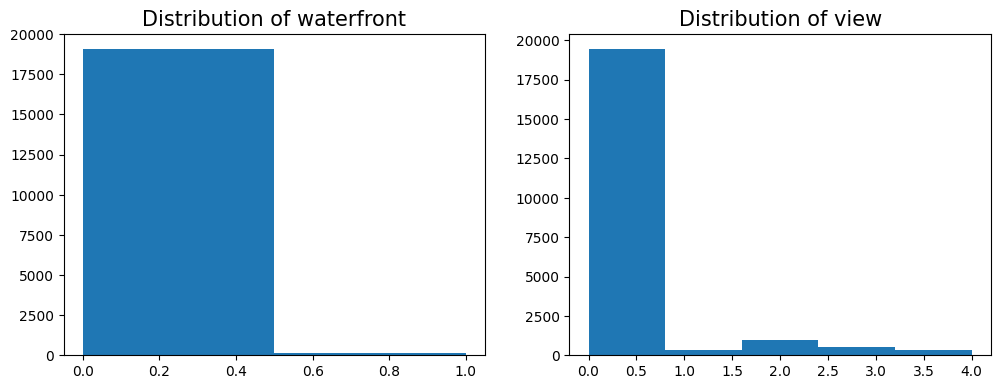

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,4)) # create subplots on 1 rows and 2 columns
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

# setting bins to max values from this column (for view + 1) as obtained from the df.describe()

ax[0].hist(x = df.waterfront, bins = 2) # creates histogram for column waterfront
ax[0].set_title("Distribution of waterfront", fontsize = 15); # sets title for subplot

ax[1].hist(x = df.view, bins = 5)
ax[1].set_title("Distribution of view", fontsize = 15);   

We see similar distributions for these values:  

* waterfront - strongly positively skewed. Only two values present, most entries with value 0 and some with value 1. Assuming view is a categorical variable where 0 means False and 1 means True (agrees with convention of how boolean is stored as int + likely that waterfront view is available for minority of houses). Could be stored as int but likely has missing values as indicated by `df.info()` - will handle in section below.  
* view - stronly positively skewed. Given that this column indicates whether a house has been viewed, the number can be interpreted as how many times it has been viewed. We see that the vast majority of houses have been viewed 0 times, with the rest being viewed up to 4 times. If this interpretation is correct, it seems surprising to me that so many houses have been sold without being viewed first.   
Like waterfront, this column was seen to have some missing values, which I will address in the section below.  

### Handling missing values and final type conversion  

We have already seen an example of missing values that make perfect sense in the 'yr_renovated' column: some houses don't have a renovation date listed, presumably because they haven't been renovated yet. There are more columns with NAs, as in the summary of the columns by `df.info()`. Now I will inspect them more thoroughly.   

In [32]:
# display number of missing values per column
df.isna().sum()

house_id             0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
sale_date            0
price                0
sale_id              0
dtype: int64

<Axes: >

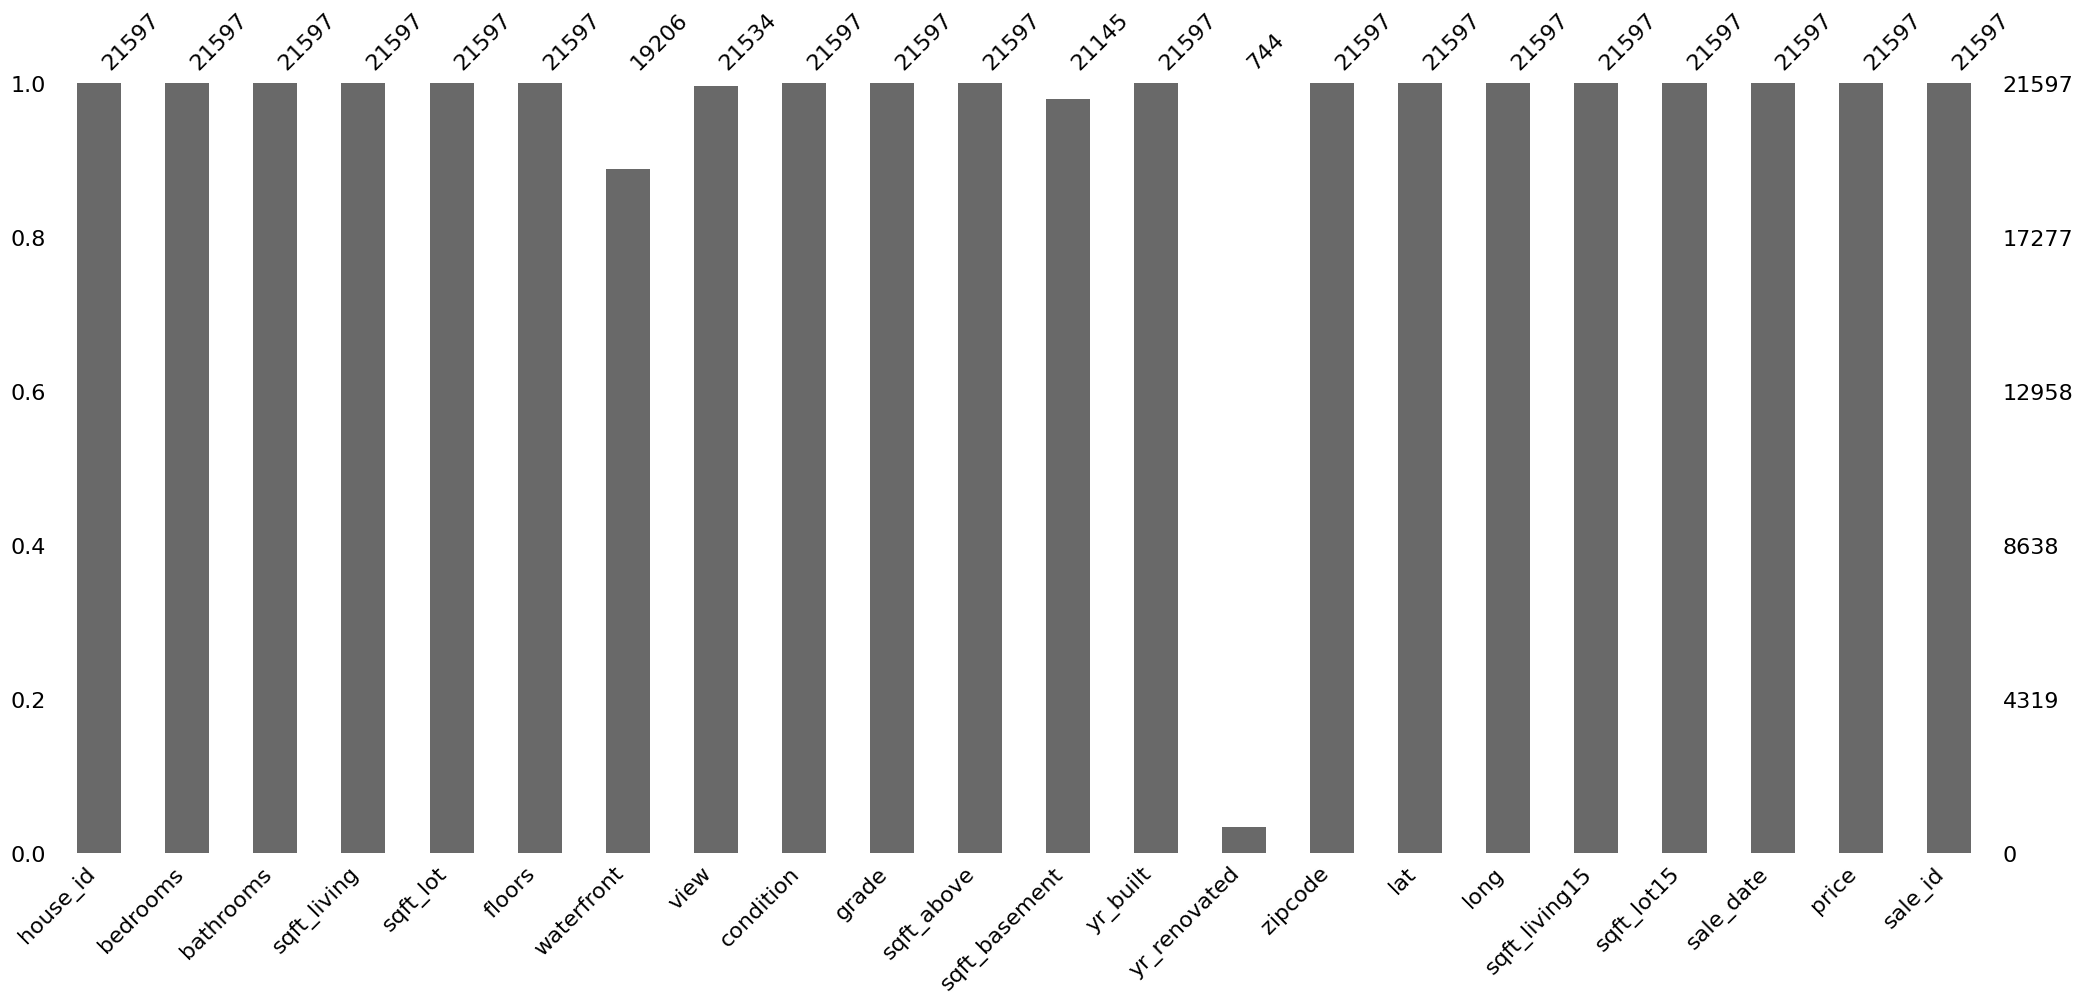

In [33]:
# use barplot from missingno package for clear visual overview
msno.bar(df)

The columns with missing values are:  
* waterfront - unclear what the missing values indicate in this binary classification (house does or does not have waterfront), other than no information being available. Since my client is explicitly interested in houses without waterfont, I will tidy up this table below.  
* view - very few missing values, but like with waterfront they have no additional meaning. However, since my client's and my interest in how many times a house has been viewed is low, I am fine with retaining these entries as NAs and possibly revisit later.
* sqft_basement - missing values can be interpreted as the house not having a basement. Since my client is not particularly interested in this specific feature, I am fine with leaving them as NAs.
* yr_renovated - as mentioned above, this is an indication that the house hasn't been renovated, which seems to be the case for the majority of houses. As mentioned above, I prefer to leave the NAs in this column since they convey meaningful information and will not be included in summary statistics or plots (as they would if I would for example replace them with zeroes).  

In summary, based on my specific interest in the dataset, I will only change the waterfront column. Since this column stores a simple yes/no information on whether the house has a waterfront view or not (with some unclear cases), I can convert it to a categorical variable and store it as a string with clear names.   

In [34]:
# fill NA with placeholder value that I can replace in the next step
df.waterfront.fillna(2, inplace=True)

# map all values to strings
df.waterfront = df.waterfront.map({0:"No",1:"Yes",2:"Unknown"})

# convert variable to categorical
df.waterfront = pd.Categorical(df.waterfront)
df.waterfront.unique()

['Unknown', 'No', 'Yes']
Categories (3, object): ['No', 'Unknown', 'Yes']

### Save cleaned dataset

To avoid having to repeat these steps when restarting the session, I will save the modified and cleaned version of the dataset as a csv file in the same folder:  

In [35]:
df.to_csv('data/eda_clean.csv',index=False)

In [36]:
# reload when necessary
#df = pd.read_csv('data/eda_clean.csv')

## 2. Data exploration: understanding the dataset  

The goal of this section is to get a better understanding of specific variables in the dataset and how they related to each other. While I'm not yet making specific recommendations to my client, I will tend to focus on variables that will be important based on his requirements.  

The client's specifications are: unlimited budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront.  

### Univariate analysis

Before diving into more specific hypothesis-driven dataset exploration, I would like to understand the range or frequency of values stored in each column. To achieve this I will plot the interesting numerical values with a histogram and the categorical values ('waterfront' and 'sale_date' grouped into years) in a bar plot:  

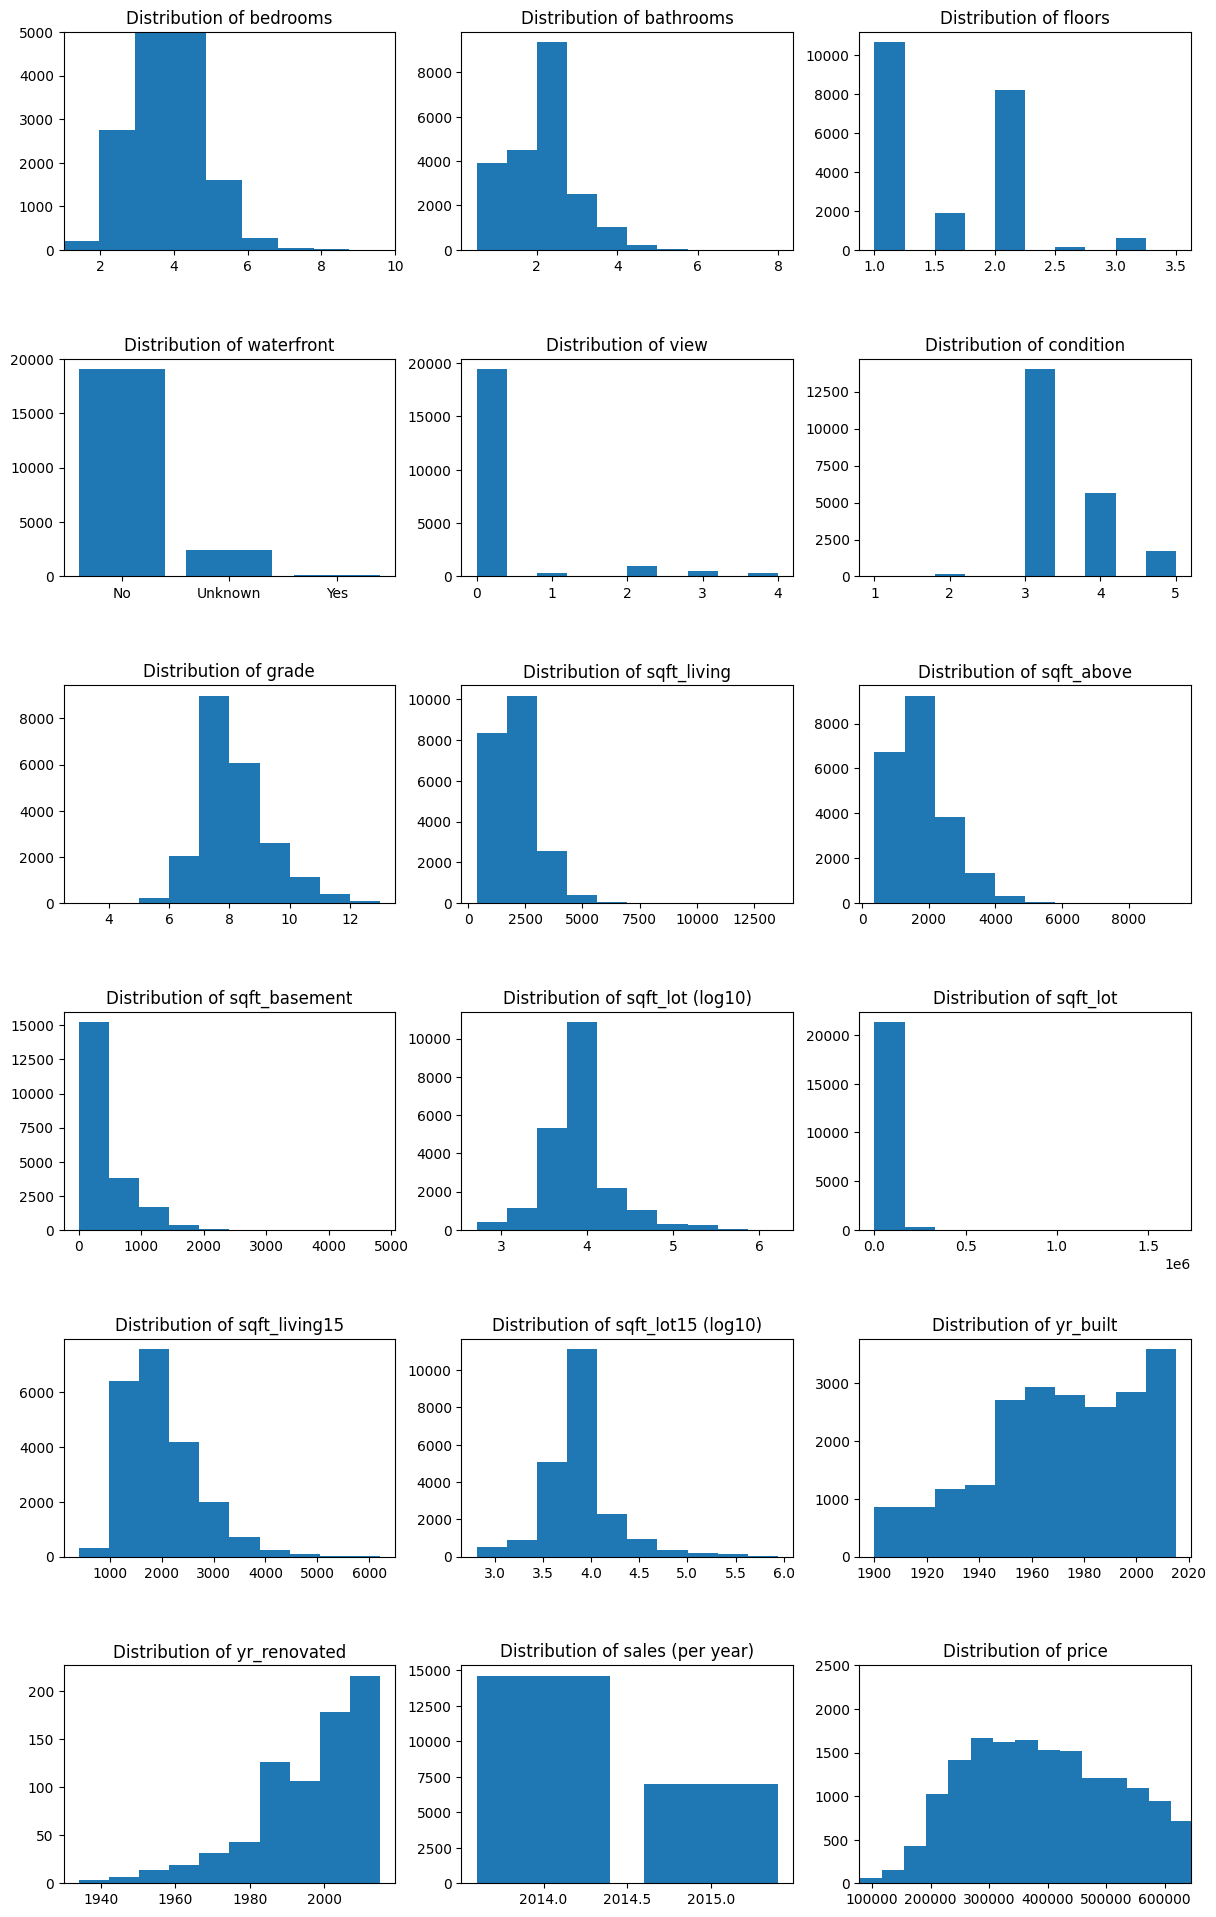

In [37]:
# 17 columns in total, plot all on a 3 x 6 grid, with last space empty
fig, ax = plt.subplots(6,3, figsize=(12,21))
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

# for the individual plots, in case default settings resulted in uninformative plots  
# I adjusted the bin, xlim and ylim parameters so full range of data is better visible

# for lots, I plotted log(10) values because the range was too wide for overview

ax[0][0].hist(x = df.bedrooms, bins = 33)
ax[0][0].set_title("Distribution of bedrooms", fontsize = 12)
ax[0][0].set_ylim(0,5000) # limits y axis heght 
ax[0][0].set_xlim(1,10) # limits x axis range

ax[0][1].hist(x = df.bathrooms)
ax[0][1].set_title("Distribution of bathrooms", fontsize = 12)

ax[0][2].hist(x = df.floors)
ax[0][2].set_title("Distribution of floors", fontsize = 12)

ax[1][0].bar(x = df.groupby(df["waterfront"]).size().index, 
             height = df.groupby(df["waterfront"]).size())
ax[1][0].set_title("Distribution of waterfront", fontsize = 12)

ax[1][1].hist(x = df.view)
ax[1][1].set_title("Distribution of view", fontsize = 12)

ax[1][2].hist(x = df.condition)
ax[1][2].set_title("Distribution of condition", fontsize = 12)

ax[2][0].hist(x = df.grade)
ax[2][0].set_title("Distribution of grade", fontsize = 12)

ax[2][1].hist(x = df.sqft_living)
ax[2][1].set_title("Distribution of sqft_living", fontsize = 12)

ax[2][2].hist(x = df.sqft_above)
ax[2][2].set_title("Distribution of sqft_above", fontsize = 12)

ax[3][0].hist(x = df.sqft_basement)
ax[3][0].set_title("Distribution of sqft_basement", fontsize = 12)

ax[3][1].hist(x = np.log10(df['sqft_lot']))
ax[3][1].set_title("Distribution of sqft_lot (log10)", fontsize = 12)

ax[3][2].hist(x = df['sqft_lot'])
ax[3][2].set_title("Distribution of sqft_lot", fontsize = 12)

ax[4][0].hist(x = df.sqft_living15)
ax[4][0].set_title("Distribution of sqft_living15", fontsize = 12)

ax[4][1].hist(x = np.log10(df.sqft_lot15))
ax[4][1].set_title("Distribution of sqft_lot15 (log10)", fontsize = 12)

ax[4][2].hist(x = df.yr_built)
ax[4][2].set_title("Distribution of yr_built", fontsize = 12)

ax[5][0].hist(x = df.yr_renovated)
ax[5][0].set_title("Distribution of yr_renovated", fontsize = 12)

ax[5][1].bar(x = df.groupby(df["sale_date"].dt.year).size().index, 
             height = df.groupby(df["sale_date"].dt.year).size())
ax[5][1].set_title("Distribution of sales (per year)", fontsize = 12)

ax[5][2].hist(x = df.price, bins = 200)
ax[5][2].set_title("Distribution of price", fontsize = 12)
ax[5][2].set_ylim(0,2500)
ax[5][2].set_xlim(78000,645000); # zoom in on interquartile range

Main takeaways from this plot:  
* Most houses have 1 or 2 floors. In terms of room numbers, bedrooms and bathrooms both peak at 3, but there are still houses to choose from with 4+ bathrooms (important for my client).
* As already seen before, the majority of the houses don't have waterfront view. Since my client doesn't want one, it means there is still a wide range left to choose from.
* The condition and grade both peak in the middle of the range, but the majority of remaining houses are above middle range. It should easiest to get a house of average quality, but there are still quite a few options of higher quality (with the added advantage for my client is that their budget isn't limited so they won't need to be filtered on price).
* The lot areas have a very wide range, spanning several orders of magnitude - I used a logarith transformation of both 'sqft_lot' and 'sqft_lot15' (adjacent 15 houses) to get a general idea of the trend. However, the majority of the houses fall into the category up to 10000 square feet (see plot for 'sqft_lot' without log). Arguably, these can all be considered small. The lot area might be one of the more restricting parameters in my client's search.
* The year the house was created ranges from early 1900s to 2015. In order to offer my client a historical house, I will need to focus on the earlier portion of this range.  

Not all variables have been included in the overview above. Some were ommitted because they are irrelevant for understanding the trends ('sales_id' and 'house_id'). Geographical data such as 'zipcode', 'lat' and 'long' do not have very informative frequency distributions and will be explored with more specialized tools during hypothesis testing.  

### Hypothesis testing  

Some of the questions I want to answer about the dataset along with specific hypotheses:  

* Where are the houses with large lots located?  (due to time constraints did not test this yet!!)  
    hyp: Houses with large lots are more likely to be in the countryside  
            - need additional dataset to verify this  
* How many houses have a golf field nearby? (due to time constraints did not test this yet!!)  
    hyp: Few houses have a golf field nearby  
    hyp: The houses with a golf field nearby are more likely to be in the suburbs/countryside  
            - need another additional dataset to verify this  
* What are historic houses like?  
    hyp: The older the house, the less likely it is to be of high quality  
    hyp: The older the house, the fewer bathrooms it is likely to have
    hyp: The age of the house and the lot size are not strongly correlated

#### Year house was built vs quality

Hypothesis: the older the house, the less likely it is to be of high quality.  

There are two variables in the dataset that provide information on quality: 'condition' (how good the overall condition is, range 1-5) and 'grade' (overall grade based on King County grading system, range 1-13). More information on what these columns mean can be obtained from the King County [website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) (thanks to Ron Silva for the link and summary):

BUILDING CONDITION    
Relative to age and grade. Coded 1-5.  
1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.  
2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.  
3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.  
4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.  
5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.  

BUILDING GRADE    
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:  
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.  
4 Generally older, low quality construction. Does not meet code.  
5 Low construction costs and workmanship. Small, simple design.  
6 Lowest grade currently meeting building code. Low quality materials and simple designs.  
7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.  
8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.  
9 Better architectural design with extra interior and exterior design and quality.  
10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.  
11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.  
12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.  
13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.  

To simplify the analysis, I want to create a general quality score based on a combination of two values above. First I want to understand how these two variables correlate - does it even make sense to group them? Since these values are de facto categorical (integer with narrow range), a scatter plot doesn't return useful results. As an alternative I construct and visualize a co-occurence matrix between these two variables (inspired by this [link](https://saturncloud.io/blog/how-to-construct-a-cooccurrence-matrix-in-python-pandas/)).  

In [38]:
co_occurrence_matrix = pd.crosstab(df.grade, df.condition)

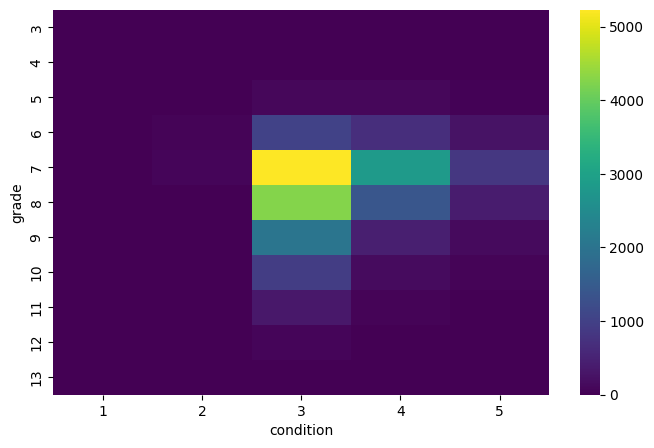

In [39]:
plt = sns.heatmap(co_occurrence_matrix, cmap='viridis')

This plot shows the highest co-occurence at the intersection of modes of both values: houses of grade 7 and condition 3. If there is a trend of co-clustering of higher grade houses with higher condition houses, it's not visible due to the relative smallness of these categories. In other words: for practical purposes it makes no sense to group these two values. Use independently to verify hypothesis.  

In [42]:
# reimport matplpotlib - for some reason after running seabort plot the metplotlib commands
# are returning errors
import matplotlib.pyplot as plt

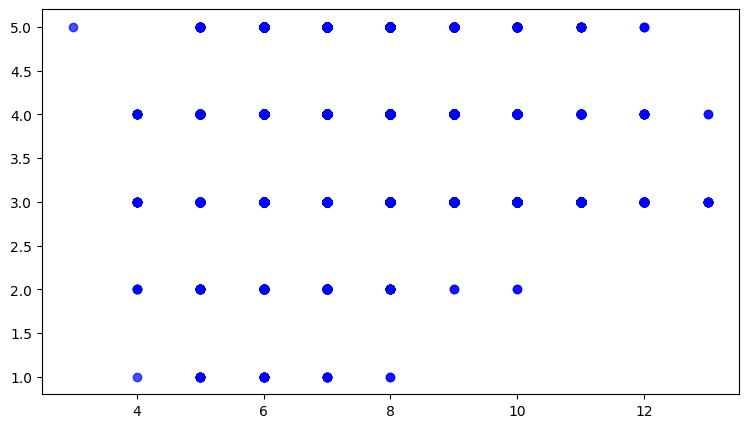

In [43]:
# attempt at scatter plot - run this cell to get a really useless plot
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x=df.grade, y=df.condition, color = "blue", alpha = 0.7);

In [44]:
df.grade.unique()

array([ 7,  8,  6,  9,  5, 10, 11, 12,  4, 13,  3])

In [45]:
df[df.grade == 9].grade.head(10)

8     9
15    9
17    9
28    9
29    9
30    9
31    9
32    9
33    9
64    9
Name: grade, dtype: int64

In [46]:
# group grade into some categories to reduce number of values for plot
grade_ctg = df.grade
grade_ctg.unique()

array([ 7,  8,  6,  9,  5, 10, 11, 12,  4, 13,  3])

In [47]:
# map values to simplified classes
grade_ctg = grade_ctg.map({0:"unacceptable",1:"unacceptable",2:"unacceptable",
                           3:"unacceptable",4:"unacceptable", 5:"unacceptable", 
                           6:"low", 7:"low", 
                           8:"average", 9:"average",
                           10:"high", 11:"high",
                           12:"top", 13:"top"})
grade_ctg.unique()

array(['low', 'average', 'unacceptable', 'high', 'top'], dtype=object)

In [48]:
# create new categorical variable in dataset based on the number of bathrooms
df['grade_ctg'] = pd.Categorical(grade_ctg)

''

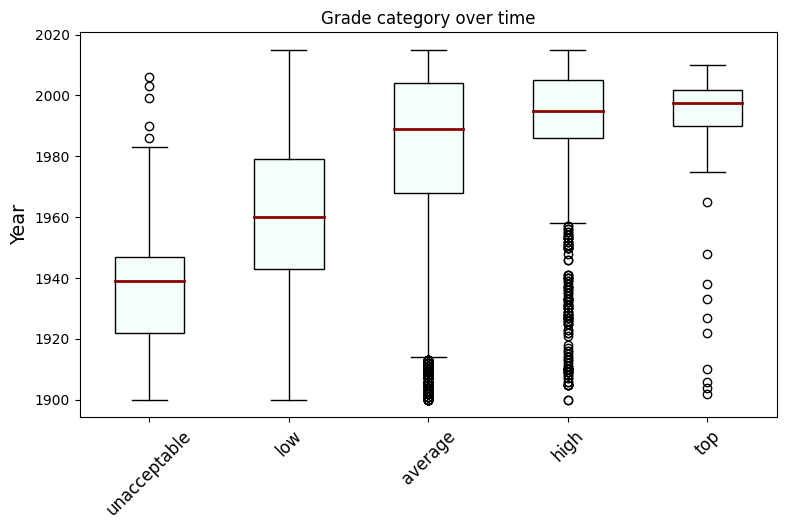

In [62]:
fig, ax = plt.subplots(figsize=(9,5))

bp = ax.boxplot([df.yr_built[df.grade_ctg == "unacceptable"], 
                 df.yr_built[df.grade_ctg == "low"],
                 df.yr_built[df.grade_ctg == "average"],
                 df.yr_built[df.grade_ctg == "high"],
                 df.yr_built[df.grade_ctg == "top"]],
                 patch_artist=True)

# changing color for boxplot: surprisingly complicated
# solution adapted from https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
colors = ['mintcream', 'mintcream', 'mintcream', 'mintcream', 'mintcream']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='darkred',
               linewidth = 2)

ax.set_title('Grade category over time')
ax.set_ylabel('Year', fontsize=14)
ax.set_xticklabels(["unacceptable", "low", "average", "high", "top"],
                    rotation=45, fontsize=12)
;

''

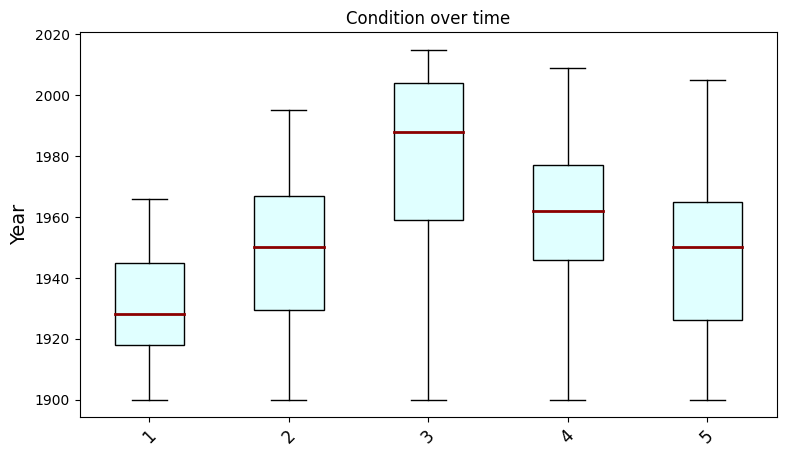

In [61]:
fig, ax = plt.subplots(figsize=(9,5))

bp = ax.boxplot([df.yr_built[df.condition == 1], 
                 df.yr_built[df.condition == 2],
                 df.yr_built[df.condition == 3],
                 df.yr_built[df.condition == 4],
                 df.yr_built[df.condition == 5]],
                 patch_artist=True)

# changing color for boxplot: surprisingly complicated
# solution adapted from https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
colors = ['lightcyan', 'lightcyan', 'lightcyan', 'lightcyan', 'lightcyan']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='darkred',
               linewidth = 2)

ax.set_title('Condition over time')
ax.set_ylabel('Year', fontsize=14)
ax.set_xticklabels(["1", "2", "3", "4", "5"],
                    rotation=45, fontsize=12)
;

The boxplots indicate that the hypothesis was mostly correct: the median of grade is steadily increasing over time, therefore the older houses are likely to be of lower quality. Condition makes the picture a bit more blurry, as it indicates that some of the earlier houses (1940s to 1960s) have a better condition than houses built in the 1980s - maybe those have been renovated? No time to look into this now.  

Takeaway for data filtering: although my client has no budget limitations and can invest in repairing and renovating the house, it makes sense to start with at least decent quality - therefore filter for condition >= 3 and grade >= 7. Depending on how I define historical house (built in which year?), the dataset will shrink more or less at this stage.    

#### Year house was built vs number of bathrooms

Hypothesis: the older the house, the fewer bathrooms it is likely to have.  

Hypothesis based on my experience with old houses. This is a more simple relationships between two variables and straightforward to test. Since my client wants a house with 4+ bathrooms, I will group the dataset values in two categories: 1-3 bathrooms and 4+ bathrooms. This will allow for easy visualization of the distribution of when these houses were built on a histogram plot.  

In [51]:
# saving the bathroom numbers column as a pandas series and convert to integer
# (there are some intermediate values (maybe indicating partially equipped bathroom or just toilet) that I'm not interested in)
bathroom_ctg = df.bathrooms.astype(int)
bathroom_ctg.unique()

array([3, 1, 2, 4, 0, 5, 7, 6, 8])

In [52]:
# map values to two simple classes: 0-3 and 4+
bathroom_ctg = bathroom_ctg.map({0:"0-3",1:"0-3",2:"0-3",3:"0-3",
                                4:"4+", 5:"4+", 6:"4+", 7:"4+", 8:"4+"})
bathroom_ctg.unique()

array(['0-3', '4+'], dtype=object)

In [53]:
# create new categorical variable in dataset based on the number of bathrooms
df['bathroom_ctg'] = pd.Categorical(bathroom_ctg)

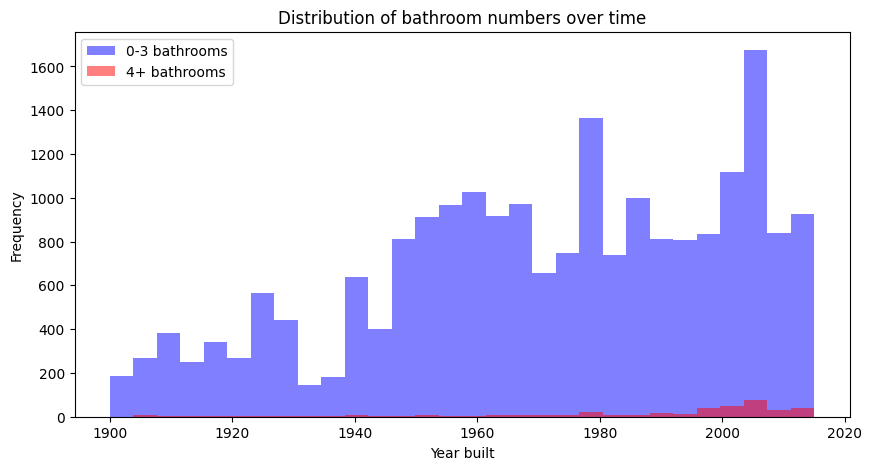

In [54]:
# plot histogram of year house was built for two categories of bathroom numbers
fig, ax = plt.subplots(figsize=(10,5))

kwargs = dict(alpha=0.5, bins=30)

ax.hist(df.yr_built[df.bathroom_ctg == "0-3"], **kwargs, color='b', label='0-3 bathrooms')
ax.hist(df.yr_built[df.bathroom_ctg == "4+"], **kwargs, color='r', label='4+ bathrooms')
ax.set(title='Distribution of bathroom numbers over time', ylabel='Frequency', xlabel='Year built')
plt.legend();

The histogram shows more houses with 4+ bathrooms have been build recently, but the number of houses in the 0-3 categories is so much higher that those in the 4+ category that it's impossible to eastimate ratios. Try boxplot for a more quantitative overview.  

''

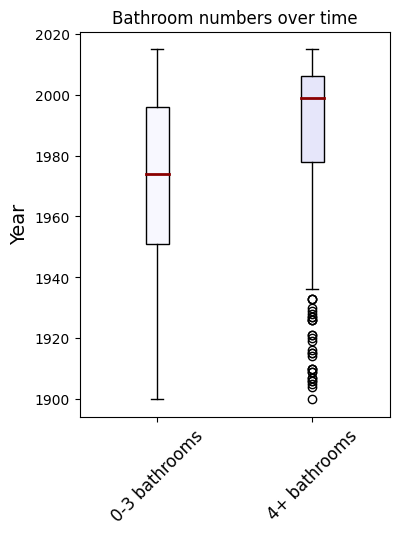

In [55]:
fig, ax = plt.subplots(figsize=(4,5))

bp = ax.boxplot([df.yr_built[df.bathroom_ctg == "0-3"], df.yr_built[df.bathroom_ctg == "4+"]],
           patch_artist=True)

# changing color for boxplot: surprisingly complicated
# solution adapted from https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
colors = ['ghostwhite', 'lavender']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='darkred',
               linewidth = 2)

ax.set_title('Bathroom numbers over time')
ax.set_ylabel('Year', fontsize=14)
ax.set_xticklabels(["0-3 bathrooms", "4+ bathrooms"],
                    rotation=45, fontsize=12)
;

The boxplot indicates that the hypothesis was correct: the older the house, the less likely it is to have many bathrooms.  

Takeaway for data filtering: depending on how exactly one defines a historical house, applying the bathroom filtering criteria may shrink the dataset size quite dramatically. Worth looking into option two (smaller house nearby).  

#### Year house was built vs lot size

Lot size we are looking for depends on requirements. Things specified by client:
* pool - approx. 13500 sqft (Olympic pool)
* tennis court - appox. 7200 sqft (standard)
* golf court - 4.5 million sqft (standard)

Values above are based on a quick online search and rounded up for a quick estimate.

Based on those values I will define a 'lotsize_cat' categorical variable to group the houses into following three groups: 
* small lot up to 21000 sqft (rounding up pool + tennis court)
* large lot above 21000 sqft
* extra large lot above 4.5 million sqft

In [76]:
# saving the lotsize numbers column as a pandas series 
lotsize_ctg_in = df.sqft_lot.to_list()
len(lotsize_ctg_in)

21597

In [77]:
# convert to three categories described above with list comprehension
# need to stored in different variable otherwise mixing types (string/) cause problems
lotsize_ctg = ["small" if element <= 21000 else "large" if 21000 < element < 4500000 else "extra_large" for element in lotsize_ctg_in]

In [81]:
# create new categorical variable in dataset based on the number of bathrooms
df['lotsize_ctg'] = pd.Categorical(lotsize_ctg)
print(df['lotsize_ctg'].nunique(), df['lotsize_ctg'].unique())

2 ['small', 'large']
Categories (2, object): ['large', 'small']


Apparently no extra large lot sizes are available - does this make sense? Based on max value, yes! This means we need to look for golf courts already present in the vicinity.

In [82]:
df.sqft_lot.max()

1651359.0

In [88]:
# size of remaining categories
# todo: print percantage summary!  
df.groupby(df['lotsize_ctg']).size()

lotsize_ctg
large     2197
small    19400
dtype: int64

''

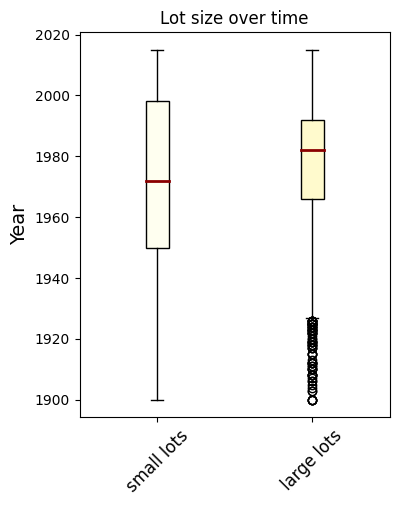

In [90]:
fig, ax = plt.subplots(figsize=(4,5))

bp = ax.boxplot([df.yr_built[df.lotsize_ctg == "small"], df.yr_built[df.lotsize_ctg == "large"]],
           patch_artist=True)

# changing color for boxplot: surprisingly complicated
# solution adapted from https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
colors = ['ivory', 'lemonchiffon']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='darkred',
               linewidth = 2)

ax.set_title('Lot size over time')
ax.set_ylabel('Year', fontsize=14)
ax.set_xticklabels(["small lots", "large lots"],
                    rotation=45, fontsize=12)
;

#### Lot size vs golf course

In [91]:
# geographical data is a whole new topic of analysis for me, so for the first pass 
# I relly heavily on a tutorial provided at
# https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
import geopandas as gpd
from shapely.geometry import Point, Polygon

<Axes: >

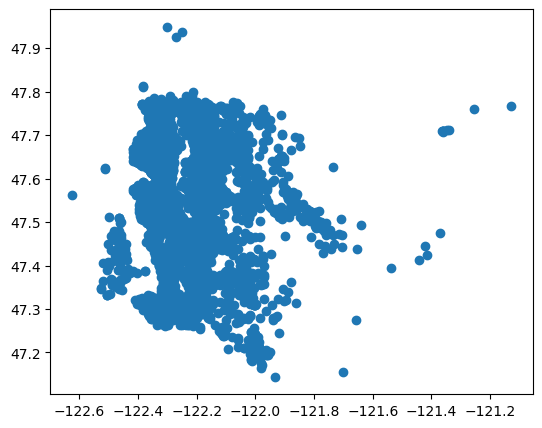

In [94]:
# to my shock I managed to find a dataset with golf course and other points of interest
king_county_map = gpd.read_file('cpi_data/Common_Points_of_Interest_for_King_County____common_interest_point.shp')
king_county_map.plot()

In [95]:
king_county_map.head()

,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE,geometry
0,1,10000050,1005599,901,Black Diamond Library Ballot Drop Box,Black Diamond Library (055),24707 Roberts Dr,98010,POINT (-122.01265 47.31174)
1,2,10001063,NaN,800,Federal Way Bethel Baptist Church,Bethel Baptist Church,35905 16TH AVE S,98003,POINT (-122.31409 47.27960)
2,3,10000051,124849,901,Carnation Library Ballot Drop Box,Carnation Library (095),4804 Tolt Ave,98014,POINT (-121.91230 47.65054)
3,4,2917,338412,510,U District Link Light Rail Station,U District Link Light Rail Station,4300 Brooklyn Ave NE,98105,POINT (-122.31398 47.66010)
4,5,10000078,520459,662,Evergreen High School,Evergreen,830 SW 116th St,98146,POINT (-122.34552 47.49970)


In [96]:
king_county_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    5558 non-null   int64   
 1   FEATURE_ID  5558 non-null   int64   
 2   ESITE       4548 non-null   object  
 3   CODE        5558 non-null   int64   
 4   NAME        5558 non-null   object  
 5   ABB_NAME    5558 non-null   object  
 6   ADDRESS     5556 non-null   object  
 7   ZIPCODE     5558 non-null   object  
 8   geometry    5558 non-null   geometry
dtypes: geometry(1), int64(3), object(5)
memory usage: 390.9+ KB


In [99]:
king_county_map.CODE.nunique()

50

In [ ]:
#type(king_county_map.CODE.type)

In [ ]:
#king_county_map["CODE" == 300].shape

In [102]:
king_county_map.ESITE.nunique()

2530

## 3. Data exploration: tailored recommendations for the client

In this section, I attempt to address the specific wishes of my client and help them select the best houses for their purpose. Some of the insights from the hypothesis testing have already informed this process. But there are also additional filtering criteria that I did not adress in the previous phase:  

* Which houses don't have a waterfront?  
* Which houses with <4 bathrooms have a small house nearby?

To successively apply all these criteria, I will make a subset dataset that contains only columns of interest.  

In [106]:
# clean up later, now just filter successively
df_fil = df[df.waterfront != "Yes"]
df_fil.shape

(21451, 25)

In [107]:
df_fil = df_fil[df_fil.bathroom_ctg == "4+"]
df_fil.shape

(380, 25)

In [108]:
df_fil = df_fil[df_fil.lotsize_ctg == "large"]
df_fil.shape

(109, 25)

In [110]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 109 to 20159
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       109 non-null    int64         
 1   bedrooms       109 non-null    float64       
 2   bathrooms      109 non-null    float64       
 3   sqft_living    109 non-null    float64       
 4   sqft_lot       109 non-null    float64       
 5   floors         109 non-null    float64       
 6   waterfront     109 non-null    category      
 7   view           108 non-null    float64       
 8   condition      109 non-null    int64         
 9   grade          109 non-null    int64         
 10  sqft_above     109 non-null    float64       
 11  sqft_basement  108 non-null    float64       
 12  yr_built       109 non-null    int64         
 13  yr_renovated   5 non-null      float64       
 14  zipcode        109 non-null    int64         
 15  lat            109 non-n

In [121]:
df_fil['good_quality'] = np.where(df_fil['grade'] >= 8, True, False)

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 109 to 20159
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       109 non-null    int64         
 1   bedrooms       109 non-null    float64       
 2   bathrooms      109 non-null    float64       
 3   sqft_living    109 non-null    float64       
 4   sqft_lot       109 non-null    float64       
 5   floors         109 non-null    float64       
 6   waterfront     109 non-null    category      
 7   view           108 non-null    float64       
 8   condition      109 non-null    int64         
 9   grade          109 non-null    int64         
 10  sqft_above     109 non-null    float64       
 11  sqft_basement  108 non-null    float64       
 12  yr_built       109 non-null    int64         
 13  yr_renovated   5 non-null      float64       
 14  zipcode        109 non-null    int64         
 15  lat            109 non-n

In [123]:
df_fil.groupby('grade').size()

grade
7      1
8      3
9      8
10    28
11    38
12    24
13     7
dtype: int64

In [122]:
df_fil.groupby('good_quality').size()

good_quality
False      1
True     108
dtype: int64

[Text(0.5, 0, 'Year built'),
 Text(0, 0.5, 'Lot size (sqft)'),
 Text(0.5, 1.0, 'Lot size vs year built')]

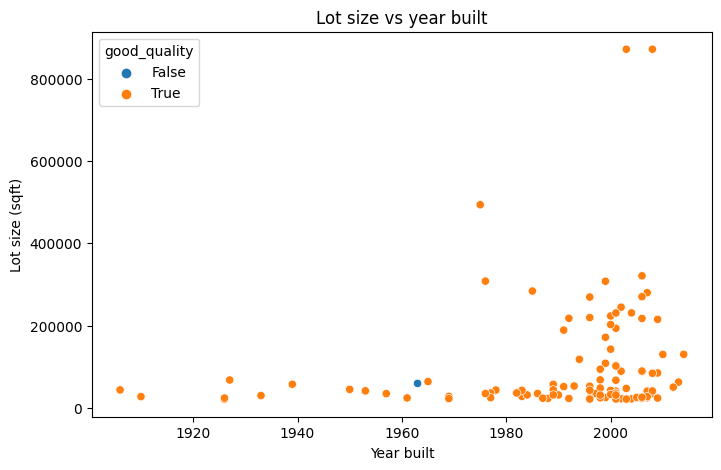

In [128]:
plt = sns.scatterplot(data=df_fil, x="yr_built", y="sqft_lot", hue="good_quality")
plt.set(xlabel = 'Year built', ylabel = 'Lot size (sqft)', 
        title = 'Lot size vs year built')

## 4. Conclusions  

#todo
After completing analysis, summarize approach and main findings here.  

### Ideas for improvement and further exploration  

* run statistical tests on different distributions
* boxplots with year built: flip axes so year is on the x-axis, more intuitive reading
* find a dataset with golf courts and integrate being near to golf court in filtering step
* are the nearest 15 houses actually near? not necessarily the case in the countryside. include a distance metric based on geographical data for more accurate results  